In [1]:
import pandas as pd


In [2]:
data=pd.read_excel(r'C:\Users\K S Kalaburgi\AppData\Local\Temp\Temp1_train.csv.zip\train.xlsx')


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
data["labels"]=data[data.columns[0]]


In [6]:
data.drop("label",axis=1,inplace=True)


In [7]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [8]:
data.columns


Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'labels'],
      dtype='object', length=785)

In [9]:
data.shape

(42000, 785)

In [10]:
import matplotlib.pyplot as plt


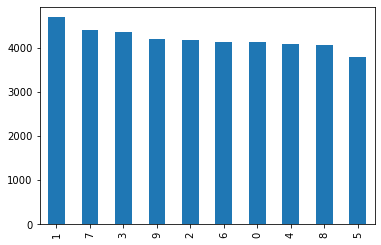

In [11]:
#dataset is balanced
data_check = data['labels'].value_counts().plot(kind='bar')

In [12]:
x_mod = data.drop(['labels'], axis = 1, inplace = False)
y = data['labels']

In [13]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [14]:
array = x_mod.values 
min_max_scale = MinMaxScaler()
x_scale = min_max_scale.fit_transform(array)
x = pd.DataFrame(x_scale)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
para={"C":[1,0.9,0.8],
    "random_state":[100,50,200,350,50],
     "max_iter":[100,150,130,200,300,80],
     "verbose":[10,20,30,50,25],
     "n_jobs":[-1,2,3]}

# logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
logreg=LogisticRegression()

In [21]:
ran=RandomizedSearchCV(logreg,para,n_iter=100,cv=5)

In [22]:
ran.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   51.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   51.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   50.3s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   50.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   48.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   48.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   47.5s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   47.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   48.4s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   14.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   14.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   13.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   13.4s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   13.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.3s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.6s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   25.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   25.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.7s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   25.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   25.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.9s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   57.6s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   57.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   58.2s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   58.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   58.0s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   58.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   57.1s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   57.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   56.8s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.7s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   20.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   21.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   21.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   22.2s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   36.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   36.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   38.8s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   38.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   38.3s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   38.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   38.2s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   38.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   38.3s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   19.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   19.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   18.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   15.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   30.3s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   30.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   29.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.8s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   29.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   27.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   27.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   28.2s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   33.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   30.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   25.3s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   25.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   24.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   24.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   24.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   24.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   25.0s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   25.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   25.2s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   22.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   20.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   20.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   19.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   19.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   20.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   20.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   21.0s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   45.6s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   45.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   44.9s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   44.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   47.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   47.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   47.3s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   17.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   17.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   17.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   17.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.3s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   16.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.7s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   26.6s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   26.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   22.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   30.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   30.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   30.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   30.1s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   30.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   28.5s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   28.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.2s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   26.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   26.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   26.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   26.0s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   26.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   25.5s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   25.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   26.0s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   30.6s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   30.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   22.5s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   22.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   25.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   25.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   24.0s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   24.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.4s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   23.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   23.1s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   57.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   57.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   56.4s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   56.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   57.4s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   57.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   56.1s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   56.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   57.4s
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   27.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Don

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   32.2s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   32.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   32.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   32.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   29.7s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   29.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   29.8s
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   29.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   34.2s
[Parallel(n_jobs=2)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:  3.6min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   44.9s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   44.9s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   43.3s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   43.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   49.8s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   49.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done   1 out of   

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   31.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   31.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   29.8s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   29.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:  3.6min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   34.7s
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:   34.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:   33.7s
[Parallel(n_jobs=3)]: Done   1 out of   

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [1, 0.9, 0.8],
                                        'max_iter': [100, 150, 130, 200, 300,
                                                     80],
                                        'n_jobs': [-1, 2, 3],
                                        'random_state': [100, 50, 200, 350, 50],
                                        'verbose': [10, 20, 30, 50, 25]})

In [23]:
ran.best_params_

{'verbose': 10, 'random_state': 200, 'n_jobs': 2, 'max_iter': 80, 'C': 1}

In [24]:
logreg1=LogisticRegression(C=1,verbose= 20, random_state= 350, n_jobs= 3, max_iter= 80)

In [25]:
logreg1.fit(x_train,y_train)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:  1.1min finished


LogisticRegression(C=1, max_iter=80, n_jobs=3, random_state=350, verbose=20)

In [26]:
y_pre1=logreg1.predict(x_test)

In [27]:
y_pre1

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

In [28]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
print(r2_score(y_test,y_pre1))
print(accuracy_score(y_test,y_pre1))
print(classification_report(y_test,y_pre1))

0.8467243329883029
0.9222619047619047
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       853
           1       0.95      0.98      0.96       940
           2       0.92      0.92      0.92       835
           3       0.90      0.89      0.90       873
           4       0.94      0.94      0.94       829
           5       0.87      0.88      0.87       731
           6       0.95      0.97      0.96       800
           7       0.92      0.93      0.92       850
           8       0.90      0.85      0.87       846
           9       0.89      0.90      0.89       843

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



# Decision Tree

In [29]:
para={"criterion":["gini","entropy"],
     "max_depth":[5,10],
     "min_samples_leaf":[5,10,15],
     "max_features":[5,10]}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt=DecisionTreeClassifier()

In [33]:
ran=GridSearchCV(dt,para,cv=5)

In [34]:
ran.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'max_features': [5, 10],
                         'min_samples_leaf': [5, 10, 15]})

In [35]:
ran.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 10}

In [36]:
dt=DecisionTreeClassifier(min_samples_leaf= 5,
 max_features= 10,
 max_depth= 10,
 criterion= 'entropy')

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_leaf=5)

In [38]:
y_pre2=dt.predict(x_test)

In [39]:
y_pre2

array([1, 5, 2, ..., 5, 8, 8], dtype=int64)

In [40]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_pre2))
print(classification_report(y_test,y_pre2))

0.7367857142857143
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       853
           1       0.93      0.93      0.93       940
           2       0.71      0.75      0.73       835
           3       0.77      0.71      0.74       873
           4       0.65      0.45      0.53       829
           5       0.62      0.74      0.67       731
           6       0.79      0.77      0.78       800
           7       0.73      0.76      0.75       850
           8       0.71      0.67      0.69       846
           9       0.57      0.70      0.63       843

    accuracy                           0.74      8400
   macro avg       0.74      0.73      0.73      8400
weighted avg       0.74      0.74      0.74      8400



# Random Forest

In [41]:
para={"criterion":["gini","entropy"],
     "max_depth":[3,7,9,5,10],
     "min_samples_split":[5,10,2,4,6],
     "max_features":("sqrt","auto")
     }

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc=RandomForestClassifier()

In [45]:
ran=RandomizedSearchCV(dt,para,n_iter=100,cv=5)

In [46]:
ran.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    max_features=10,
                                                    min_samples_leaf=5),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 7, 9, 5, 10],
                                        'max_features': ('sqrt', 'auto'),
                                        'min_samples_split': [5, 10, 2, 4, 6]})

In [47]:
ran.best_params_

{'min_samples_split': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [48]:
rfc=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=50,min_samples_split= 5,
 max_features="sqrt",
 max_depth= 10,
 criterion= 'entropy')

In [49]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=50, n_jobs=-1,
                       random_state=50)

In [50]:
y_pre3=rfc.predict(x_test)

In [51]:
y_pre3

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

In [52]:
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_pre3))
print(classification_report(y_test,y_pre3))

0.9463095238095238
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       853
           1       0.97      0.98      0.98       940
           2       0.94      0.95      0.95       835
           3       0.95      0.91      0.93       873
           4       0.94      0.93      0.93       829
           5       0.94      0.93      0.94       731
           6       0.97      0.98      0.97       800
           7       0.96      0.93      0.94       850
           8       0.92      0.94      0.93       846
           9       0.90      0.92      0.91       843

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400

